## Aufgabe 5 


In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
np.random.seed(42)
generator = np.random.uniform(0,1,1000)

### (a) 

Es wird ein Algorithmus zur Transformation einer Gleichverteilung im Bereich 0 bis 1 auf den Bereich $x_\text{min}$ bis $x_\text{max}$ beschrieben. 

In [2]:
def gleichingrenzen(xmin, xmax, anzahl, seeed):  #Mit verschiedenen Seeeds für Aufgabe e). 
    np.random.seed(seeed)
    generator = np.random.uniform(0,1, anzahl)
    return np.array((xmax-xmin) * generator + xmin) 

### (b) 

Es wird ein Algorithmus zur Transformation einer Gleichverteilung im Bereich 0 bis 1 auf eine exponentielle Verteilung beschrieben. 

In [3]:
def gleich2exponential(tau): 
    return -np.log(1-generator)*tau  

### (c) 

Es wird ein Algorithmus zur Transformation einer Gleichverteilung im Bereich 0 bis 1 auf eine Potenz-Verteilung im Bereich $x_\text{min}$ bis $x_\text{max}$ mit der Potenz $n$ mit $n \geq 2$ beschrieben. 

In [4]:
def gleich2potenz(xmin, xmax, n): 
    if n >= 2:
        return (generator* (xmin**(n-1)-xmax**(n-1))/(xmax*xmin)**(n-1) + xmin**(-n+1))**(1/(-n+1)) 
    else: print("Bitte geben sie einen Wert für n größer oder gleich 2 ein.")

### (d) 

Es wird ein Algorithmus zur Transformation einer Gleichverteilung im Bereich 0 bis 1 auf eine Cauchy-Verteilung beschrieben. 

In [5]:
def gleich2cauchy():
    return np.tan(np.pi*(generator+0.5)) 

Eine Testumgebung, die die Verteilungen und ihre Funktionen plottet. 

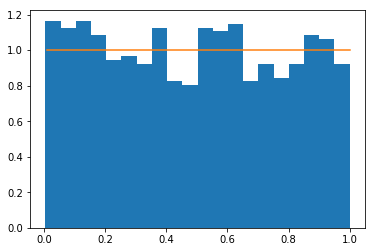

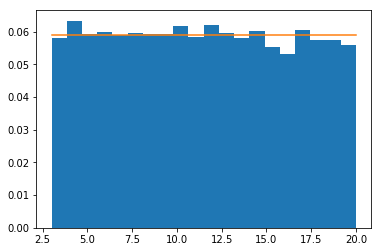

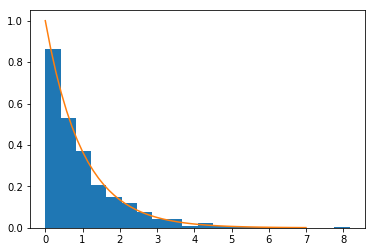

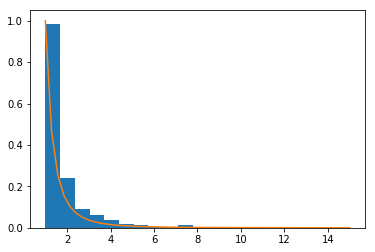

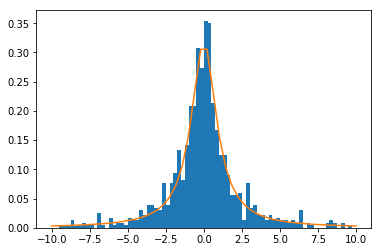

In [6]:
#Test 
#Normale Gleichverteilung

a0 = generator
def gleichverteilt(a, b, x):
    return 1/(b-a) *x/x
plt.figure(0)
plt.hist(a0, bins= 20, density=True);
plt.plot(np.linspace(0.01 ,1), gleichverteilt(0, 1, np.linspace(0.01,1)))

#Gleichverteilung mit Grenzen zwischen 3 und 20
a1 = gleichingrenzen(3,20, 10000, 42)
plt.figure(1)
plt.hist(a1, bins= 20, density= True);
plt.plot(np.arange(3,21), gleichverteilt(3, 20, np.arange(3,21)))

#Exponentialgesetz mit Tau = 1 
def exp(tau, x):
    return 1/tau * np.exp(-x/tau)
a2 = gleich2exponential(1)
plt.figure(2)
plt.hist(a2, bins=20, density=True);
plt.plot(np.linspace(0,7), exp(1, np.linspace(0,7)))

#Potenzgesetz mit n= 3
def potenz(n, x):
    return x**(-n)
a3 = gleich2potenz(1, 15, 3)
plt.figure(3)
plt.hist(a3, bins=20, density =True)
plt.plot(np.linspace(1,15), potenz(3, np.linspace(1, 15)))

#Cauchyverteilung
def cauchy(x):
    return 1/np.pi * 1/(1+x**2)
a4 = gleich2cauchy()
plt.figure(4)
plt.hist(a4, bins= 80, range=(-10,10), density=True);
plt.plot(np.linspace(-10,10), cauchy(np.linspace(-10, 10)))
None

Mit dem Neumann-Rückweisungsverfahren wird die Verteilung, die sich zu den Werten des empirischen Histogramms ergibt berechnet und anschließend dargestellt.

In [7]:
def neumann(x,y):
    u1, u2 = gleichingrenzen(0,1, 10**5, 42), gleichingrenzen(0, np.amax(y), 10**5, 48) #Zwei gleichverteilte Zufallsgrößen werden erzeugt
    u = [] #ein leeres Array wird erstellt
    for i in range(len(u1)): #falls y an einer Stelle x unter dem Wert der Verteilung liegt, wird dieser hinzugefügt, sonst wird er verworfen
        if y[np.argwhere((x < u1[i]+0.01) & (x >= u1[i]-0.01))[0,0]] > u2[i]:
            u = np.append(u, u1[i])
    return u


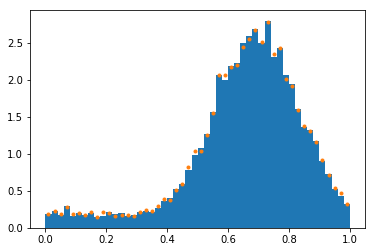

In [8]:
x,y = np.genfromtxt("empirisches_histogramm.csv", delimiter=",", unpack=True)
x = np.delete(x, 0) #Lösche nan in csv Datei
y = np.delete(y, 0) #Lösche nan in csv Datei
N = np.sum(0.02*y) #Bestimme Normierung
y = y/N #Normiere y 
plt.figure(5) 
plt.hist(neumann(x,y), bins=50, density=True);
plt.plot(x, y, ".");
None

## Aufgabe 6 

### (a) 
Es soll ein Zufallszahlengenerator nach dem vorgegebenen Schema programmiert werden. Dabei sollen $b=3$ und $m = 1024$ gesetzt werden. 
Die Periodenlänge soll in Abhängigkeit von $a$ in einem angemessenen Bereich verwendet werden. 
Der Zusammenhang wird in einem Plot dargestellt. 


In [9]:
def lgc(a):
    x = np.array([20]) #seeed
    for i in range(1024):
        if (((a*x[i]+3)%1024) not in x): #Falls neues Element bereits enthalten in Array, soll abgebrochen werden
            x = np.append(x, (a*x[i]+3)%1024)  #hinzufügen des neuen Elements
        else: 
            break
    return x    

In [10]:
# Test
def testfunc(a):
    anzahl = []
    for i in range(0, a):
            anzahl = np.append(anzahl, len(lgc(i)))
    return anzahl

Es wird graphisch ausgewertet, für welche Werte von $a$ die Funktion entweder aufgrund von Periodizität abbricht oder aufgrund von dem erreichen eines Fixpunktes abbricht und welche Länge die maximale Periodenlänge ist und bei welchen Werten diese Auftritt. Es wird der Bereich von 0 bis 80 betrachtet, danach wiederholt sich das Muster nur mehrfach. Wenn man einen größeren Bereich betrachten will, braucht man nur den Parameter $b$ zu ändern.

Maximum der Periodenlänge:  1024.0
Werte für a mit der maximalen Periodenlänge:  [ 1  5  9 13 17 21 25 29 33 37 41 45 49 53 57 61 65 69 73 77]


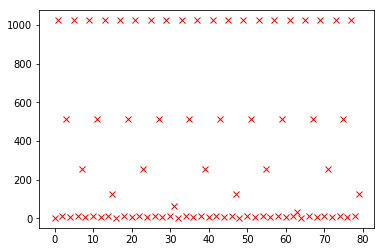

In [11]:
b = 80
y = testfunc(b)
a = np.arange(b)
print("Maximum der Periodenlänge: ", np.max(y)) 
print("Werte für a mit der maximalen Periodenlänge: ", a[y==np.max(y)])
plt.figure(6)

plt.plot(a, y, "rx")
None

Dieses Ergebnis lässt sich mit den Regeln für gute linear-kongruente Generatoren erklären. 
Nach den Regeln teilt jeder Primfaktor von m (a-1) und wenn m durch 4 teilbar ist, dann (a-1) auch.
Somit erfüllen dann die Zahlen $a = 1+4 n$ mit $n \in \mathbb{N}$ genau diese Bedingung. 

Es soll eine "Gleichverteilung mit dem $lgc$-Verfahren erstellt werden  mit $a = 1601$, $b = 3456$ und mit einem Wert von $m = 10000$. Anschließend wird dieser geplottet. Hier wurden jetzt $10001$ Zahlen erzeugt, damit man keine Probleme mit der Dimension beim Aufteilen der Werte in zwei bzw. drei Arrays bekommt.

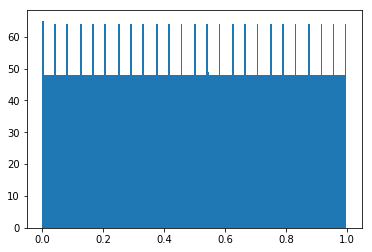

In [12]:
def newlgc(n, seeed):
    x = np.array([seeed])
    for i in range(n):
        x = np.append(x, (1601*x[i]+3456)%10000) 
    return x/10000

a = newlgc(10001, 20) 

plt.figure(7)
plt.hist(a, bins= 200);

Mit der vorher erstellten Gleichverteilung werden ein 2D- und 3D-Scatter erstellt. 

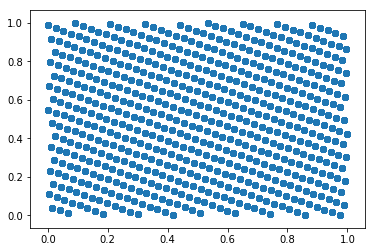

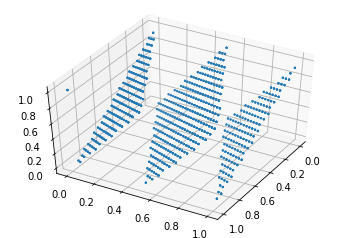

In [13]:
#Erstellen der 2D Verteilung
neu1 = a[0::2]
neu2 = a[1::2]

plt.figure(8)
ax = plt.scatter(neu1, neu2) #Erstellen des 2D Scatter Plots

#Erstellen der 3D Verteilung
new1 = a[0::3]
new2 = a[1::3]
new3 = a[2::3]

fig = plt.figure(9)
ax = fig.add_subplot(111 , projection ='3d') #Erstellen des 3D Scatter Plots

ax.view_init(45, 30) 
ax.scatter(
new1, new2, new3,
lw=0, 
s=5,  
)
None

Im Folgenden wird eine Gleichverteilung mit der $random.uniform$-Funktion erstellt und dieselbe graphische Auswertung durchgeführt wie zuvor.

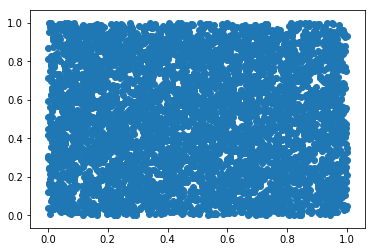

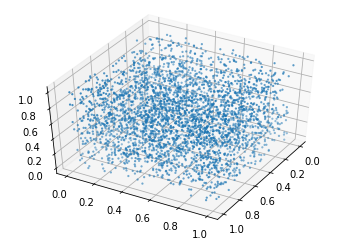

In [14]:
#Erstellen der 2D
np.random.seed(42)
c = np.random.uniform(0,1, 10000)
neu1 = c[0::2]
neu2 = c[1::2]

plt.figure(8)
ax = plt.scatter(neu1, neu2) #Erstellen des 2D Scatter Plots

#Erstellen der 3D
np.random.seed(42)
d = np.random.uniform(0,1,10002)
new1 = d[0::3]
new2 = d[1::3]
new3 = d[2::3]

fig = plt.figure(9)
ax = fig.add_subplot(111 , projection ='3d') #Erstellen des 3D Scatter Plots

ax.view_init(45, 30) 
ax.scatter(
new1, new2, new3,
lw=0, 
s=5,  
)
None

Für die Funktion $newlgc$ wird getestet, wann der exakte Wert $\frac{1}{2}$ erzeugt wird. Es wird der Bereich für den Seeed von 0 bis 19.9 in 0.1er Schritten abgedeckt und anschließend ausgegeben, wie häufig der Wert einhalb für den jeweiligen Seeed erreicht wurde.

In [15]:
for p in range(200):
    e = newlgc(10001, 0.1*p)
    j = 0
    for i in range(10000):
        if (e[i] == 0.5):
            j = j+1
    if j != 0:
        print(j, "x wird der Wert 1/2 bei Seeed ", p*0.1, " erreicht.", sep="")
        
print("\nBei den restlichen Seeds wird dieser Wert nicht erreicht.")    

16x wird der Wert 1/2 bei Seeed 8.0 erreicht.

Bei den restlichen Seeds wird dieser Wert nicht erreicht.


# Nr. 7 

### a)  
Es soll gezeigt werden mit welcher Wahrscheinlichkeit $x$ einen Wert zwischen $\frac{1}{3}$ und $\frac{1}{2}$ annimmt. 

\begin{align*}
P\left(x \in \left[\frac{1}{3},\frac{1}{2}\right]\right) &= \int_{\frac{1}{3}}^{\frac{1}{2}} x \; \text{d}x \\
&= \frac{1}{2} - \frac{1}{3}\\
&= \frac{1}{6}
\end{align*}

### b) 
Es wird die Wahrscheinlichkeit bestimmt, dass der Wert $\frac{1}{2}$ von $x$ angenommen wird. 
\begin{align*} 
P\left(x = \frac{1}{2}\right) = 0 
\end{align*}

### c)
Es wird bestimmt mit welcher Wahrscheinlichkeit ein Zufallsgenerator auf einem Computer den exakten Wert $\frac{1}{2}$ annimmt, wenn der Generator sein Ergebnis in Form einer binären Gleitkommazahl mit einer Mantisse von $23$ Binärstellen annimmt. 

\begin{align*} 
P_\text{Computer}\left(x = \frac{1}{2}\right) = \frac{1}{n} = \frac{1}{2^{23}} = 2^{-23} \text{ mit } n = 2^{23}
\end{align*}

### d)
Es soll bestimmt werden, mit welcher Wahrscheinlichkeit der Zufallsgenerator den exakten Wert $\frac{2}{3}$ annimmt. 

$\frac{2}{3}$ kann nicht exakt dargestellt werden. 
\begin{align*} 
P_\text{Computer}\left(x = \frac{2}{3}\right) = 0
\end{align*}

# Nr. 8 

### a) 
Zwei Populationen werden in einem zweidimesionalem Scatter-Plot dargestellt. 

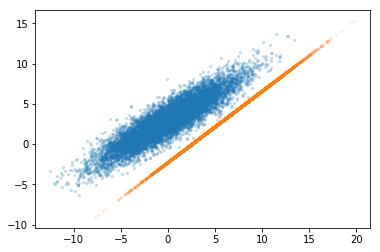

In [16]:
#Erzeugung der ersten Population P0 
np.random.seed(42)
mean1 = [0, 3] #Vorgegebene Erwartungswerte
sigmax1, sigmay1 = 3.5, 2.6 #vorgegebene Standardabweichungen
covfac = 0.9 #Korrelation 
cov1 = [sigmax1**2, sigmax1*sigmay1*covfac],[sigmax1* sigmay1*covfac, sigmay1**2] # Kovarianzmatrix
p0 = np.random.multivariate_normal(mean1, cov1, 10000)

#Erzeugung der zweiten Population P1, die hier p heißt und aus p1 und p2 besteht
np.random.seed(42)
p1 = np.random.normal(6,3.5, 10000)
np.random.seed(42)
p2 = np.random.normal(-0.5+p1*0.6, 1, 10000)
p = np.c_[p1,p2]

#Erstellen des Plots
plt.figure(10)
plt.scatter(p0[:,0], p0[:,1], s=5, alpha= 0.2)
plt.scatter(p1, p2, s=5, alpha=0.1)


None

### b)

In [17]:
def werte(x, y): #Funktion zur Ausgabe der Stichproben Werte
    mittelx, mittely = np.mean(x), np.mean(y) #Mittelwert bestimmen
    cov = np.cov(x,y) #Kovarianzmatrix bestimmen
    varianzx, varianzy = cov[0,0], cov[1,1] #Varianz bestimmen
    kovarianz = cov[0,1] #Kovarianz bestimmen
    koeff = kovarianz/(np.sqrt(varianzx)*np.sqrt(varianzy)) #Korrelationskoeffizient
    
    print("Stichproben-Mittelwert x: ", mittelx)
    print("Stichproben-Mittelwert y: ", mittely)
    print("Stichproben-Varianz x: ", varianzx)
    print("Stichproben-Varianz y: ", varianzy)
    print("Stichproben-Kovarianz: ", kovarianz)
    print("Stichproben-Korrelationskoeffizient: ", koeff)
    

In [18]:
print("\nWerte von P0:")
werte(p0[:,0], p0[:,1]) #Werte von P0 bestimmen
print("\nWerte von P1:")
werte(p[:,0], p[:,1]) #Werte von P1 bestimmen
px = np.append(p0, p, axis=0)
print("\nWerte von Gesamtheit beider Populationen:")
werte(px[:,0], px[:,1]) #Werte der Gesamtheit beider Populationen bestimmen


Werte von P0:
Stichproben-Mittelwert x:  -0.016670970469251745
Stichproben-Mittelwert y:  2.9969582292241896
Stichproben-Varianz x:  12.503246573316531
Stichproben-Varianz y:  6.904099090131463
Stichproben-Kovarianz:  8.39356652262761
Stichproben-Korrelationskoeffizient:  0.9034032130880885

Werte von P1:
Stichproben-Mittelwert x:  5.992524058210509
Stichproben-Mittelwert y:  3.093378451557878
Stichproben-Varianz x:  12.334975176298078
Stichproben-Varianz y:  9.676662158712194
Stichproben-Kovarianz:  10.92526372757829
Stichproben-Korrelationskoeffizient:  1.0

Werte von Gesamtheit beider Populationen:
Stichproben-Mittelwert x:  2.9879265438706284
Stichproben-Mittelwert y:  3.0451683403910343
Stichproben-Varianz x:  21.446547514272922
Stichproben-Varianz y:  8.292290415698904
Stichproben-Kovarianz:  9.803791353336063
Stichproben-Korrelationskoeffizient:  0.7351536427808752


### c)

In [19]:
np.random.seed(42)
p3 = np.random.multivariate_normal(mean1, cov1, 1000) #Population P2, hier p3 genannt, erstellt mit den Eigenschaften von Population P0

#Erstellen des P0 Keys 'data'
data = pd.DataFrame({ 
    'p0 x': p0[:,0],
    'p0 y': p0[:,1],
})

#Erstellen des P1 Keys 'data2'
data2 = pd.DataFrame({
    'p1 x': p[:,0], 
    'p1 y': p[:,1],
})

#Erstellen des P2 Keys 'data3'
data3 = pd.DataFrame({
    'p2 x': p3[:,0],
    'p2 y': p3[:,1]})


#Speichern der jeweiligen Keys
data.to_hdf('data.hdf5', key='data')
data2.to_hdf('data2.hdf5', key='data2')
data3.to_hdf('data3.hdf5', key='data3')